<a href="https://colab.research.google.com/github/JuanFdoGf/PracticasDS/blob/main/Perceptr%C3%B3nMulticapa_Regresi%C3%B3n_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

##1. Definición del conjunto de datos de entrenamiento

In [2]:
from tensorflow.keras import datasets

In [3]:
boston_housing = datasets.boston_housing

In [4]:
(X_train, y_train),  (X_test, y_test) = boston_housing.load_data()

In [5]:
import pandas as pd
import numpy as np

In [6]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
            'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df_train = pd.DataFrame(np.column_stack([X_train, y_train]), columns=features)
df_train.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
5,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5
6,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60,11.3
7,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42,15.6
8,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65,15.6
9,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4


In [7]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

##2. Definición de la arquitectura de la Red Neuronal Artificial

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Input

In [9]:
network = models.Sequential([
    Input(shape=(X_train.shape[1:])),
    layers.Dense(30, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
])

In [10]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 741 (2.89 KB)

 Trainable params: 741 (2.89 KB)

 Non-trainable params: 0 (0.00 B)

##3. Configuración de la Red Neuronal Artificial

In [11]:
network.compile(loss='mean_squared_error',
                optimizer='sgd')

##4. Preparación del conjunto de datos

In [12]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_prep = scaler.fit_transform(X_train)
X_val_prep = scaler.transform(X_val)
X_test_prep = scaler.transform(X_test)

##5. Entrenamiento de la Red Neuronal Artificial

In [13]:
history = network.fit(X_train_prep,
                      y_train,
                      epochs=30,
                      validation_data=(X_val_prep, y_val))

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 526.7628 - val_loss: 198.2992
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 352.0890 - val_loss: 345.7527
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 265.2391 - val_loss: 252.6065
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 174.5171 - val_loss: 196.9930
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 161.1969 - val_loss: 163.2939
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 136.3685 - val_loss: 142.0443
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 104.5250 - val_loss: 128.9567
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 100.2501 - val_loss: 120.8918
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 86.2005 - val_loss: 115.9313
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 94.6795 - val_loss: 112.5029
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 97.5430 - val_loss: 110.3930
Epoch 12/30
13/13 ━━━━━━━

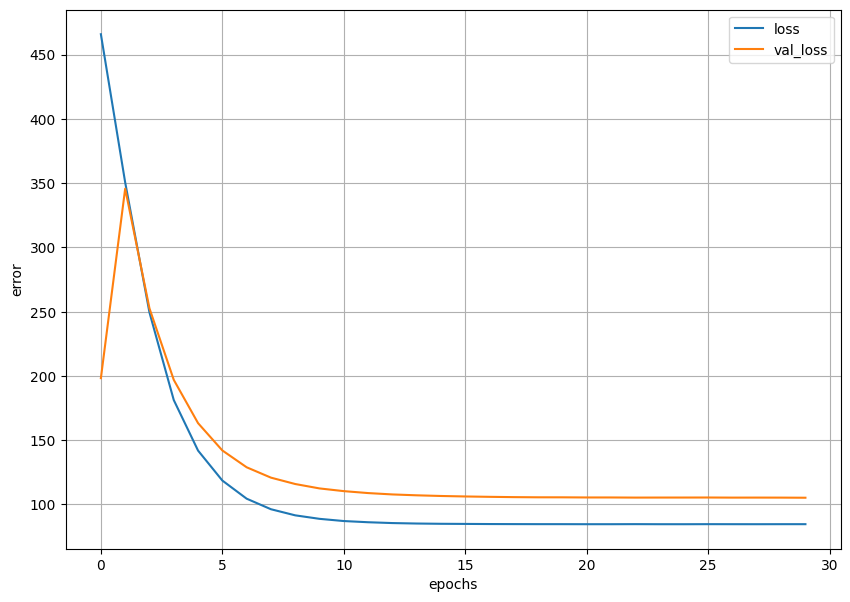

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('error')
plt.show()

##6. Validación con el conjunto de datos de pruebas

In [15]:
test_loss = network.evaluate(X_test_prep, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 60.6356 


In [16]:
print('test_mse:', test_loss)

test_mse: 62.176422119140625


##7. Predicción de nuevos ejemplos

In [17]:
# Suponemos que X_new es un nuevo ejemplo que el algoritmo no ha visto nunca
X_new = X_test[30]

In [18]:
# Representación gráfica del nuevo ejemplo que queremos predecir
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
            'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df_new = pd.DataFrame([X_new], columns=features[:-1])
df_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25


In [19]:
# Preprocesamos el nuevo ejemplo que queremos predecir

scaler = RobustScaler()
scaler.fit(df_new)

X_new_prep = scaler.transform(df_new)

In [20]:
# Realizamos la predicción
y_predict = network.predict(X_new_prep)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [21]:
# Comparamos la predicción con el valor original
print('Predicción:', y_predict.round(2))
print('Valor original:', y_test[30])

Predicción: [[22.39]]
Valor original: 20.9
